In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

Text(0, 0.5, 'Brightness')

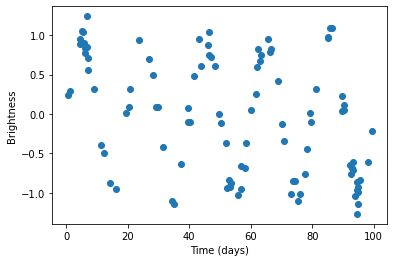

In [5]:
# generate random data 

dates = 100 * np.random.random(100)
fluxes = np.sin(0.1 * np.pi * dates) + 0.15 * np.random.standard_normal(100)

# fake period is around ~20 days 

plt.scatter(dates,fluxes)
plt.xlabel('Time (days)')
plt.ylabel('Brightness')

Text(0, 0.5, 'Power')

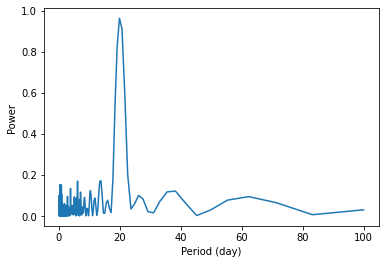

In [6]:
frequencies, powers = LombScargle(dates, fluxes).autopower(minimum_frequency=0.01, maximum_frequency=10)
# max freq and min freq


periods = 1/frequencies 
# convert frequencies to periods because periods are easier to work with / think about imo
# remember that freq=1/p and thus p = 1/freq

plt.plot(periods, powers)
plt.xlabel('Period (day)')
plt.ylabel('Power')

Text(0, 0.5, 'Brightness')

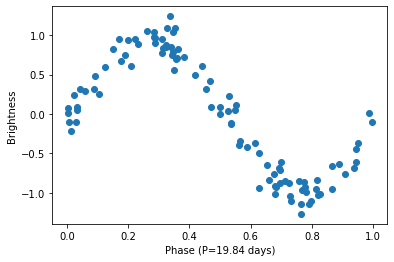

In [7]:
# get phased diagram to see all cycles superimposed on eachother 

period = periods[np.argmax(powers)] # get period corresponding to highest power
phased_dates = np.mod(dates, period)/period # phase the dates

plt.scatter(phased_dates, fluxes)
plt.xlabel('Phase (P='+str(round(period,2))+" days)")
plt.ylabel('Brightness')
